# 使用numpy实现简单的三层神经网络
## 三层的神经网络，包括一个输入层，一个中间隐藏层和一个输出层

- 输入：X (N, input_dim)
- 输出：y (N, output_dim)

- 输入层：神经元数 input_dim 
- 隐藏层：神经元数 hidden_dim
- 输出层：神经元数 output_dim

## input layer -> hidden layer
- 权重：w1(input_dim, hidden_dim), b1(hidden_dim)
- 激活函数：relu()

## hidden layer -> output layer
- 权重：w2(hidden_dim, output_dim), b2(output_dim)
- 激活函数：sigmoid()

## 定义激活函数

In [2]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ

## 神经网络的反向传播
dx, dw, db的实现：https://blog.csdn.net/ppp8300885/article/details/78492166

C:\Software Installation\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0 929.1197313067729
100 917.3570465218083
200 916.8715022463755
300 916.8504348732048
400 916.8407295126498


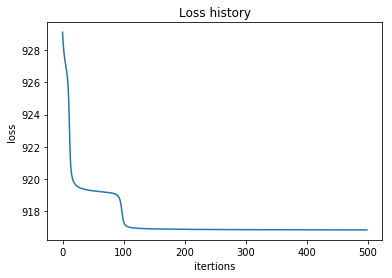

In [23]:
import numpy as np

# 定义模型参数
N, input_dim, hidden_dim, output_dim = 64,1000,100,10

# 输入数据
x = np.random.randn(N, input_dim)
# 实际的输出数据， label
y = np.random.randn(N, output_dim)

# 初始化权重大小
w1 = np.random.randn(input_dim, hidden_dim)
b1 = np.random.randn(hidden_dim)
w2 = np.random.randn(hidden_dim,output_dim)
b2 = np.random.randn(output_dim)

# 更新权重的学习率
learning_rate = 1e-5

loss_history = []
for t in range(500):
    
    # 前向传播
    h1 = x.dot(w1) + b1
    h1_relu = relu(h1)
    
    h2 = h1_relu.dot(w2) + b2
    # output is y_pred
    y_pred = sigmoid(h2)
    
    #compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 0:
        print(t, loss)
    loss_history.append(loss)
    
    # 反向传播
    grad_w1 = np.zeros(w1.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_w2 = np.zeros(w2.shape)
    grad_b1 = np.zeros(b2.shape)
    # loss 对 y 的导数
    grad_y_pred = 2.0 * (y_pred - y)
    # y_pred 对 h2 的导数
    grad_h2 = sigmoid_backward(grad_y_pred, h2)
    # h2 对 w2, b2 的导数
    grad_w2 = h1_relu.T.dot(grad_h2)
    grad_b2 = np.sum(grad_h2, axis=0)
    
    # h2 对 h1_relu 的导数
    grad_h1_relu = grad_h2.dot(w2.T)
    # h1_relu 对 h1 的导数
    grad_h1 = relu_backward(grad_h1_relu, h1)
    # h1 对 w1, b1 的导数
    grad_w1 = x.T.dot(grad_h1)
    grad_b1 = np.sum(grad_h1, axis=0)

    # 参数更新
    w1 -= grad_w1 * learning_rate
    b1 -= grad_b1 * learning_rate 
    w2 -= grad_w2 * learning_rate 
    b2 -= grad_b2 * learning_rate
    
# 打印loss
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('itertions')
plt.ylabel('loss')
plt.show()

## 第二层换成relu

0 16520146.9439903
100 3501776.046938761
200 1371864.753024533
300 665543.0775835081
400 363806.8998166
500 213094.69531971388
600 130418.71136702137
700 82396.68592018646
800 53474.865056333874
900 35509.911958784665
1000 24052.28663010899
1100 16595.528663643836
1200 11651.72774431019
1300 8326.259173751685
1400 6064.602533521899
1500 4509.835845246354
1600 3427.9024442564605
1700 2662.2844983665755
1800 2116.2421864298917
1900 1723.359144759931
2000 1439.0433721725228
2100 1232.15109470891
2200 1080.276961479641
2300 968.0514557858587
2400 886.9332206355054
2500 826.9553207083611
2600 782.2251249364816
2700 749.5375724601283
2800 724.2686991373314
2900 704.9905829217593
3000 689.9854716402842
3100 678.2440960520275
3200 669.236294534219
3300 662.657868931451
3400 657.4608051838994
3500 653.3389448522952
3600 650.067048710827
3700 647.467782829606
3800 645.4013018748974
3900 643.7573072828227
4000 642.4485567605742
4100 641.4061015606915
4200 640.5752792403093
4300 639.9127961452971


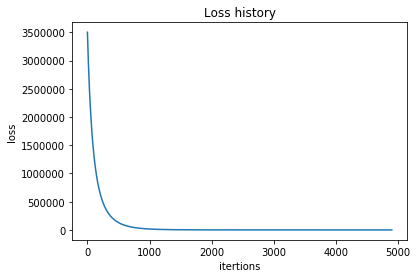

In [25]:
import numpy as np

# 定义模型参数
N, input_dim, hidden_dim, output_dim = 64,1000,100,10

# 输入数据
x = np.random.randn(N, input_dim)
# 实际的输出数据， label
y = np.random.randn(N, output_dim)

# 初始化权重大小
w1 = np.random.randn(input_dim, hidden_dim)
b1 = np.random.randn(hidden_dim)
w2 = np.random.randn(hidden_dim,output_dim)
b2 = np.random.randn(output_dim)

# 更新权重的学习率
learning_rate = 1e-8

loss_history = []
for t in range(5000):
    
    # 前向传播
    h1 = x.dot(w1) + b1
    h1_relu = relu(h1)
    
    h2 = h1_relu.dot(w2) + b2
    # output is y_pred
    y_pred = relu(h2)
    
    #compute and print loss
    loss = np.square(y_pred - y).sum()
    if(t % 100 == 0):
        print(t, loss)
    loss_history.append(loss)
    
    # 反向传播
    grad_w1 = np.zeros(w1.shape)
    grad_b1 = np.zeros(b1.shape)
    grad_w2 = np.zeros(w2.shape)
    grad_b2 = np.zeros(b2.shape)
    # loss 对 y 的导数
    grad_y_pred = 2.0 * (y_pred - y)
    # y_pred 对 h2 的导数
    grad_h2 = relu_backward(grad_y_pred, h2)
    # h2 对 w2, b2 的导数
    grad_w2 = h1_relu.T.dot(grad_h2)
    grad_b2 = np.sum(grad_h2, axis=0)
    
    # h2 对 h1_relu 的导数
    grad_h1_relu = grad_h2.dot(w2.T)
    # h1_relu 对 h1 的导数
    grad_h1 = relu_backward(grad_h1_relu, h1)
    # h1 对 w1, b1 的导数
    grad_w1 = x.T.dot(grad_h1)
    grad_b1 = np.sum(grad_h1, axis=0)

    # 参数更新
    w1 -= grad_w1 * learning_rate
    b1 -= grad_b1 * learning_rate 
    w2 -= grad_w2 * learning_rate 
    b2 -= grad_b2 * learning_rate
    
# 打印loss
import matplotlib.pyplot as plt
plt.plot(loss_history[100:])
plt.title('Loss history')
plt.xlabel('itertions')
plt.ylabel('loss')
plt.show()

## 模型的结构化

0 9496068.043187242
100 2546840.7649006615
200 1246469.29270251
300 759235.8584194104
400 508966.34703538014
500 360785.6908313981
600 264813.3488031465
700 199259.33477237407
800 153059.43175933874
900 119756.64886996218
1000 95120.16768776505
1100 76586.87037874857
1200 62296.358114975985
1300 50996.39316960832
1400 41890.57284493189
1500 34488.58759337653
1600 28490.515558204337
1700 23608.378951223305
1800 19620.90114053491
1900 16353.214988457197
2000 13668.663578634725
2100 11460.94388132694
2200 9641.78376245494
2300 8140.177268908961
2400 6898.585738032189
2500 5870.269573282294
2600 5017.210449476353
2700 4308.427299427274
2800 3717.7844276839905
2900 3223.7259998057516
3000 2810.2851315474913
3100 2464.1403462569497
3200 2173.994540700197
3300 1930.6749823591929
3400 1727.1129336906342
3500 1556.0171990811841
3600 1412.143354852406
3700 1291.1082290082454
3800 1189.2390231593965
3900 1103.4662918071476
4000 1031.2210016227903
4100 970.6480074228836
4200 919.5827524980689
4300

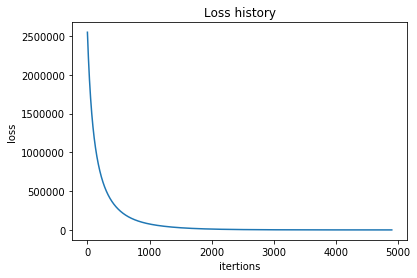

In [29]:
import numpy as np

class Three_Neural_Networks(object):
    def __init__(self,N, input_dim, hidden_dim, output_dim):
        self.N = N
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        # 初始化权重大小
        self.w1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.random.randn(hidden_dim)
        self.w2 = np.random.randn(hidden_dim,output_dim)
        self.b2 = np.random.randn(output_dim)
      
        # forward
    def forward(self, x):
        w1, w2, b1, b2 = self.w1, self.w2, self.b1, self.b2
        h1 = x.dot(w1) + b1
        h1_relu = relu(h1)
        h2 = h1_relu.dot(w2) + b2
        y_pred = relu(h2)
        cache = (x, h1, h1_relu, h2)
        return y_pred, cache
    
    def backward(self,dout,cache):
        x,h1, h1_relu, h2 = cache
        
        # y_pred 对 h2 的导数
        grad_h2 = relu_backward(dout, h2)
        # h2 对 w2, b2 的导数
        grad_w2 = h1_relu.T.dot(grad_h2)
        grad_b2 = np.sum(grad_h2, axis=0)

        # h2 对 h1_relu 的导数
        grad_h1_relu = grad_h2.dot(w2.T)
        # h1_relu 对 h1 的导数
        grad_h1 = relu_backward(grad_h1_relu, h1)
        # h1 对 w1, b1 的导数
        grad_w1 = x.T.dot(grad_h1)
        grad_b1 = np.sum(grad_h1, axis=0)
        
        self.grad_w1 = grad_w1
        self.grad_b1 = grad_b1
        self.grad_w2 = grad_w2
        self.grad_b2 = grad_b2
    
    def update_parameters(self, learning_rate):
        self.w1 -= self.grad_w1 * learning_rate
        self.b1 -= self.grad_b1 * learning_rate 
        self.w2 -= self.grad_w2 * learning_rate 
        self.b2 -= self.grad_b2 * learning_rate
        
    def loss(self,y_pred, y):
        loss = np.square(y_pred - y).sum()
        # loss 对 y 的导数
        dout = 2.0 * (y_pred - y)
        return loss, dout
    
# 定义模型参数
N, input_dim, hidden_dim, output_dim = 64,1000,100,10
my_neural_network = Three_Neural_Networks(N, input_dim, hidden_dim, output_dim)

# 输入数据
x = np.random.randn(N, input_dim)
# 实际的输出数据， label
y = np.random.randn(N, output_dim)

# 更新权重的学习率
learning_rate = 1e-8
loss_history = []

for t in range(5000):
    # 前向传播
    y_pred, cache = my_neural_network.forward(x)
    
    #compute and print loss
    loss, dout = my_neural_network.loss(y_pred, y)
    if(t % 100 == 0):
        print(t, loss)
    loss_history.append(loss)
    
    # 反向传播
    my_neural_network.backward(dout,cache)
    # 参数更新
    my_neural_network.update_parameters(learning_rate=learning_rate)
    
# 打印loss
import matplotlib.pyplot as plt
plt.plot(loss_history[100:])
plt.title('Loss history')
plt.xlabel('itertions')
plt.ylabel('loss')
plt.show()